In [100]:
import pandas as pd
import numpy as np
import json
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

from bs4 import BeautifulSoup  
import regex as re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

import pandas as pd
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn.metrics import f1_score

np.random.seed(42)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load, analyze and pre-process flood dataset. 

In [2]:
df=pd.read_csv('./floods_relevance.csv')

In [3]:
df.head()

,content,description,publishedAt,title,source_name,flood_relevance
0,Chat with us in Facebook Messenger. Find out w...,A pair of environmental reports reveal the wor...,2019-01-16T22:52:24Z,Melting ice could flood Brooklyn Bridge,CNN,0
1,The aid group said it had seen hundreds of cas...,With vast areas submerged by contaminated wate...,2019-03-27T15:49:20Z,Cholera Outbreak Raises New Danger in Flood-Ra...,The New York Times,0
2,Finding settings that amplify an operas drama ...,"From left: Kristine Flood, Wanda Ferrerias, Ma...",2018-12-04T17:05:05Z,"After Struggling With Homelessness, a Chorus S...",The New York Times,0
3,"The amount the ground can soak up is limited, ...","Flooding in the town of Hamburg, Iowa, on Marc...",2019-04-08T20:58:04Z,Powerful Storm Threatens More Misery in Flood-...,The New York Times,1
4,"Many of the levees, usually earthen and topped...",Hundreds of miles of levees in the Midwest hav...,2019-03-31T09:00:10Z,"‘Breaches Everywhere’: Midwest Levees Burst, a...",The New York Times,0


In [4]:
df.drop(columns=['publishedAt','source_name'], inplace=True)

In [5]:
df.head()

,content,description,title,flood_relevance
0,Chat with us in Facebook Messenger. Find out w...,A pair of environmental reports reveal the wor...,Melting ice could flood Brooklyn Bridge,0
1,The aid group said it had seen hundreds of cas...,With vast areas submerged by contaminated wate...,Cholera Outbreak Raises New Danger in Flood-Ra...,0
2,Finding settings that amplify an operas drama ...,"From left: Kristine Flood, Wanda Ferrerias, Ma...","After Struggling With Homelessness, a Chorus S...",0
3,"The amount the ground can soak up is limited, ...","Flooding in the town of Hamburg, Iowa, on Marc...",Powerful Storm Threatens More Misery in Flood-...,1
4,"Many of the levees, usually earthen and topped...",Hundreds of miles of levees in the Midwest hav...,"‘Breaches Everywhere’: Midwest Levees Burst, a...",0


In [6]:
df.shape

(1000, 4)

In [7]:
df.rename(columns={'flood_relevance':'positive'}, inplace=True)

In [8]:
df['positive'].value_counts()

0    634
1    366
Name: positive, dtype: int64

In [9]:
#df.drop(df['content'].isnull().index.values, inplace=True)
df=df[~df['content'].isnull()]

In [10]:
df.content.isnull().sum()

0

In [11]:
df.shape

(967, 4)

In [12]:
df_bs=[]
ls2=[]
stops = [stopwords.words('english'), 'playing']
for i in df['content']:
    df_bs.append(BeautifulSoup(i,'html.parser'))
ls1 = [re.sub("[^a-zA-Z]"," ", i.get_text()).lower().split() for i in df_bs]
for j in range(len(ls1)):
    a=[i for i in ls1[j] if i not in stops]
    ls2.append(" ".join(a))
# for i in range(len(data_gr1)):
#    a=[ w in data_gr1[i] if w not in stopwords.words('english')] #p_stemmer.stem(w) for
#    data.append(" ".join(a))

In [13]:
df1=pd.DataFrame(ls2)

In [14]:
df1.shape

(967, 1)

In [15]:
df_pos=df[df['positive']==1]

In [16]:
df_pos.shape

(350, 4)

In [17]:
df_neg=df[df['positive']==0]

In [18]:
df_neg.shape

(617, 4)

In [19]:
df1.shape

(967, 1)

In [20]:
df['content'].dropna(inplace=True)

In [21]:
df['content'].shape

(967,)

In [22]:
df1.rename(columns={0:'content'}, inplace=True)

In [23]:
df1.iloc[1,0]

'the aid group said it had seen hundreds of cases of acute watery diarrhea in the past few days though the germs responsible often were not known the scale of extreme damage will likely lead to a dramatic increase of waterborne diseases skin infections respiratory tract infections and malaria in the coming days and weeks said gert verdonck the groups emergency coordinator in beira hurried efforts were underway to restore running water to beira the united nations childrens agency said parts of the citys water supply system were working again with water running in percent of the pipes the government also was operating water trucks with roads submerged or damaged beira remains accessibly primarily by air and sea and relief agencies continued on wednesday to explore ways to deliver more aid to the city even more challenging was reaching rural communities some of them still without contact with the outside world more humanitarian groups arrived as the united nations urged the international 

In [24]:
df_neg1=df.sample(n=300, random_state=42)

In [25]:
df_neg1.shape #  [a-zA-Z]{2,}

(300, 4)

In [26]:
df['content'].replace('\d+', ' ', regex=True, inplace=True)

In [27]:
df.iloc[1,0]

'The aid group said it had seen hundreds of cases of acute watery diarrhea in the past few days, though the germs responsible often were not known.\r\nThe scale of extreme damage will likely lead to a dramatic increase of waterborne diseases, skin infections, respiratory tract infections and malaria in the coming days and weeks, said Gert Verdonck, the groups emergency coordinator in Beira.\r\nHurried efforts were underway to restore running water to Beira. The United Nations childrens agency said parts of the citys water supply system were working again, with water running in   percent of the pipes. The government also was operating water trucks.\r\nWith roads submerged or damaged, Beira remains accessibly primarily by air and sea, and relief agencies continued on Wednesday to explore ways to deliver more aid to the city. Even more challenging was reaching rural communities, some of them still without contact with the outside world.\r\nMore humanitarian groups arrived as the United Na

#### Use TF-IDF Vectorizer to vectorize the data set for preliminary analysis.

In [51]:
from sklearn.feature_extraction import text 

stop_words = text.ENGLISH_STOP_WORDS.union('playing','said' 'Image', 'copyright', 'Media', 'caption')
stop = list(text.ENGLISH_STOP_WORDS)
stop.extend(['playing','said', 'Image', 'copyright', 'Media', 'caption'])

# stopword = 
# newStopWords = ['playing','said' 'Image', 'copyright', 'Media', 'caption']
# stopwords.extend(newStopWords)

#stops= stopwords.words('english').extend([ 'playing' 'said' 'Image', 'copyright', 'Media', 'caption'])
tvec=TfidfVectorizer(stop_words=stop, min_df=5, max_df=1.0, max_features=1000)
tvec1=TfidfVectorizer(stop_words=stop, min_df=5, max_df=1.0, max_features=1000)

In [29]:
type(text.ENGLISH_STOP_WORDS)


frozenset

In [49]:
cont_mat=tvec.fit_transform(df['content'])
cont_mat.shape
len(tvec.get_feature_names())
cont_df=pd.SparseDataFrame(cont_mat, columns=tvec.get_feature_names())

In [31]:
cont_mat1=tvec1.fit_transform(df1['content'])
cont_mat1.shape
len(tvec1.get_feature_names())
cont_df1=pd.SparseDataFrame(cont_mat1, columns=tvec1.get_feature_names())
cont_df1.fillna(0, inplace=True)

In [32]:
cont_df.fillna(0, inplace=True)
cont_df1.fillna(0, inplace=True)

In [33]:
cont_df.head()

,abc,able,access,according,account,accused,acres,act,action,actually,...,workers,working,world,worst,worth,wrote,year,years,york,young
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.621508,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.087413,0.069582,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.094023,0.123839,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.049292,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.036419,0.089450,0.000000,0.0


In [34]:
cont_df1.head()

,abc,able,access,according,account,accused,acres,act,action,actually,...,workers,working,world,worst,worth,wrote,year,years,york,young
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.621508,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.087413,0.069582,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.094023,0.123839,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.049292,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.036419,0.089450,0.000000,0.0


In [35]:
X=df['content']
y=df['positive']

In [36]:
X1=df['content']
y1=df['positive']

In [37]:
y1.shape

(967,)

In [38]:
# This is where we would train test split when needed, to SVD before applying the KNN or other models like that.
#X_train, X_test, y_train, y_test= train_test_split (svd_df, target, stratify = target)

In [39]:
svd=TruncatedSVD(n_components=100)
svd_matrix=svd.fit_transform(cont_df)
svd_matrix.shape

(967, 100)

In [40]:
svd1=TruncatedSVD(n_components=100)
svd_matrix1=svd1.fit_transform(cont_df1)
svd_matrix1.shape

(967, 100)

## Load new Articles

In [41]:
df3=pd.read_csv('./flood_articles1.csv')

In [42]:
df3['content'].shape

(131,)

In [43]:
df3.shape

(131, 6)

In [44]:
#df=df[~df['content'].isnull()]
df3=df3[~df3['content'].isnull()]

In [45]:
#stops1= stopwords.words('english').extend(['playing', 'Image', 'copyright', 'Media', 'caption'])
tvec3=TfidfVectorizer(stop_words=stop, min_df=5, max_df=1.0, max_features=1000)

In [46]:
df3['content'].dropna(inplace=True)
df3['content'].replace('\d+', ' ', regex=True, inplace=True)

In [47]:
df3.shape

(127, 6)

In [52]:
df3.columns

Index(['content', 'description', 'publishedAt', 'title', 'source_name',
       'flood_disaster_relevance'],
      dtype='object')

In [56]:
# cont_mat=tvec.fit(df['content'])
# cont_mat=tvec.transform(df['content'])
# cont_mat.shape
# len(tvec.get_feature_names())
# cont_df=pd.SparseDataFrame(cont_mat, columns=tvec.get_feature_names())

cont_mat3=tvec.transform(df3['content'])
cont_mat3.shape
len(tvec.get_feature_names())
cont_df3=pd.SparseDataFrame(cont_mat3, columns=tvec.get_feature_names())
cont_df3.fillna(0, inplace=True)

In [58]:
cont_df3.head()

,abc,able,access,according,account,accused,acres,act,action,actually,...,workers,working,world,worst,worth,wrote,year,years,york,young
0,0.0,0.0,0.0,0.065854,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.036172,0.0,0.000000,0.0,0.000000,0.0,0.063159,...,0.0,0.0,0.00000,0.055553,0.059774,0.0,0.000000,0.032821,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.043442,0.0,0.000000,...,0.0,0.0,0.03009,0.000000,0.000000,0.0,0.018563,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.083193,0.0,0.063439,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.030733,0.075485,0.0,0.0


In [59]:
svd_test = svd.transform(cont_df3)
svd_test.shape

(127, 100)

Text(0.5, 1.0, 'Explained variance by component')

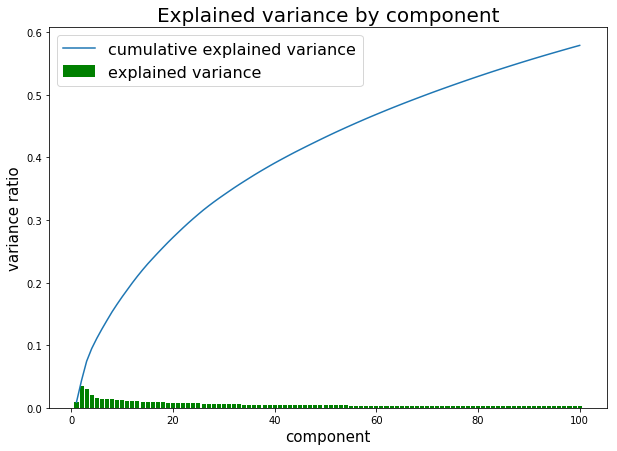

In [60]:
fig = plt.figure(figsize=(10,7))
plt.bar(np.array(range(100))+1, 
        svd.explained_variance_ratio_, 
        color='g', 
        label='explained variance')
plt.plot(np.array(range(100))+1, 
         np.cumsum(svd.explained_variance_ratio_), 
         label='cumulative explained variance')
plt.legend(fontsize=16)
plt.xlabel('component', fontsize=15)
plt.ylabel('variance ratio', fontsize=15)
plt.title('Explained variance by component', fontsize=20)

In [61]:
### Convert SVDed Matrix into a DataFrame

In [62]:
svd_df_t=pd.DataFrame(svd_matrix)
svd_df_t.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.042587,-0.042811,-0.029782,0.009489,0.049035,0.024781,-0.071959,-0.010702,0.060584,0.037556,...,-0.009962,-0.024192,0.025141,0.059213,-0.011763,0.010291,0.036777,-0.063117,0.007999,-0.007977
1,0.177443,-0.039320,-0.141726,0.130363,0.031146,0.024371,0.007979,-0.030230,-0.014278,-0.013326,...,-0.134496,0.027330,-0.167487,0.009415,-0.020492,-0.148859,0.142615,-0.026048,0.078743,-0.022554
2,0.141483,-0.128636,-0.069584,-0.022175,-0.030410,0.050623,0.010372,-0.074049,0.132516,0.097708,...,-0.056251,0.012543,-0.104113,0.004090,0.017010,0.057104,-0.049563,-0.005837,-0.006443,-0.034872
3,0.285669,0.090220,-0.091729,-0.038764,-0.028380,-0.070126,-0.067260,0.013424,0.134496,0.108700,...,-0.046420,-0.019121,0.034051,0.091362,-0.102656,0.053130,0.062113,0.129357,0.028534,0.043221
4,0.268300,-0.033243,-0.224144,0.230226,-0.121505,-0.125190,-0.006263,0.057778,0.020428,0.080898,...,-0.030480,-0.078288,0.028399,-0.098295,-0.032663,0.043367,-0.049596,0.023228,0.045788,0.024972


In [63]:
# turn svd matrix into a database:
comp_names=['component_'+str(i+1) for i in range(100)]
svd_df=pd.DataFrame(svd_matrix, columns=comp_names)
svd_df.shape

(967, 100)

In [64]:
svd_df.head()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_91,component_92,component_93,component_94,component_95,component_96,component_97,component_98,component_99,component_100
0,0.042587,-0.042811,-0.029782,0.009489,0.049035,0.024781,-0.071959,-0.010702,0.060584,0.037556,...,-0.009962,-0.024192,0.025141,0.059213,-0.011763,0.010291,0.036777,-0.063117,0.007999,-0.007977
1,0.177443,-0.039320,-0.141726,0.130363,0.031146,0.024371,0.007979,-0.030230,-0.014278,-0.013326,...,-0.134496,0.027330,-0.167487,0.009415,-0.020492,-0.148859,0.142615,-0.026048,0.078743,-0.022554
2,0.141483,-0.128636,-0.069584,-0.022175,-0.030410,0.050623,0.010372,-0.074049,0.132516,0.097708,...,-0.056251,0.012543,-0.104113,0.004090,0.017010,0.057104,-0.049563,-0.005837,-0.006443,-0.034872
3,0.285669,0.090220,-0.091729,-0.038764,-0.028380,-0.070126,-0.067260,0.013424,0.134496,0.108700,...,-0.046420,-0.019121,0.034051,0.091362,-0.102656,0.053130,0.062113,0.129357,0.028534,0.043221
4,0.268300,-0.033243,-0.224144,0.230226,-0.121505,-0.125190,-0.006263,0.057778,0.020428,0.080898,...,-0.030480,-0.078288,0.028399,-0.098295,-0.032663,0.043367,-0.049596,0.023228,0.045788,0.024972


In [65]:
comp_names=['component_'+str(i+1) for i in range(100)]
svd_df3=pd.DataFrame(svd_test, columns=comp_names)
svd_df3.shape

(127, 100)

In [66]:
#tvec_title_df=pd.DataFrame(tvec_title.toarray(), columns=tvec.get_feature_names())

In [67]:
svd.components_

array([[ 0.01699097,  0.02568251,  0.0115456 , ...,  0.0707191 ,
         0.04853429,  0.01632017],
       [ 0.01389523, -0.02270584, -0.00988901, ..., -0.06919342,
        -0.01787087, -0.02156837],
       [ 0.00059143, -0.00420147, -0.01977426, ..., -0.02137109,
         0.02762895,  0.01174086],
       ...,
       [-0.0235429 , -0.01562985, -0.02116363, ..., -0.04217013,
         0.02749236,  0.05726325],
       [ 0.00434407, -0.03361004,  0.01342814, ...,  0.02669615,
         0.05806409, -0.01307702],
       [ 0.00577748,  0.04504727,  0.00168078, ...,  0.02774015,
         0.00390863, -0.07140714]])

In [68]:
loadings=pd.DataFrame(svd.components_, index=comp_names, columns=cont_df.columns).T

In [69]:
loadings.head(10)

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_91,component_92,component_93,component_94,component_95,component_96,component_97,component_98,component_99,component_100
abc,0.016991,0.013895,0.000591,-0.024185,-0.002961,0.004526,-0.001594,-0.005165,0.013971,0.006280,...,-0.062253,0.045449,-0.056665,0.010557,-0.040991,0.056981,-0.014498,-0.023543,0.004344,0.005777
able,0.025683,-0.022706,-0.004201,0.017872,-0.004283,-0.000921,-0.007618,-0.005753,0.012147,0.018394,...,-0.029136,-0.031891,-0.031414,-0.008408,-0.007461,-0.020126,0.056331,-0.015630,-0.033610,0.045047
access,0.011546,-0.009889,-0.019774,0.009956,-0.000010,-0.004238,-0.001682,-0.000253,-0.003887,0.000066,...,-0.024773,0.003894,-0.016603,0.012121,0.006787,0.038932,-0.033366,-0.021164,0.013428,0.001681
according,0.061512,-0.013079,-0.056334,0.019619,0.013003,0.015856,-0.002019,-0.018435,-0.004393,-0.002167,...,0.021460,-0.024851,0.030761,-0.013661,-0.015427,-0.027767,0.122899,-0.104571,-0.041021,0.031881
account,0.009183,-0.012296,-0.009049,-0.001628,0.006942,0.004272,-0.004571,-0.011009,0.010514,0.004500,...,0.047783,0.022911,-0.000884,0.004125,-0.010537,0.033435,0.023579,-0.015797,-0.066317,-0.004702
accused,0.023847,-0.040205,0.050467,0.022486,-0.025117,0.054307,-0.065419,0.056859,-0.050343,0.015781,...,0.007193,0.010333,0.003248,-0.008653,-0.022671,0.005623,-0.024517,0.003225,-0.003608,0.021004
acres,0.017466,0.009592,-0.016041,0.027891,-0.005659,0.008766,0.008516,-0.003206,-0.011859,-0.013573,...,0.041461,-0.017135,-0.039881,0.009199,0.017858,-0.031723,-0.000045,0.013620,-0.005946,0.042714
act,0.010924,-0.019827,-0.012681,-0.009579,-0.007304,0.004461,-0.002745,-0.007862,0.011636,0.010976,...,0.012571,0.002706,0.009168,0.035221,0.008307,0.018845,-0.026800,0.008709,-0.027148,-0.008016
action,0.015625,-0.021135,-0.008091,-0.015454,0.011042,-0.013415,0.045127,-0.006824,0.005827,0.040552,...,0.013178,0.010250,0.019526,-0.008324,-0.016100,0.033522,-0.030472,0.012573,0.027645,0.007315
actually,0.011997,-0.014053,-0.011400,-0.005070,0.000715,0.014064,-0.005340,-0.018186,0.031291,0.015977,...,-0.014522,-0.015858,-0.000483,-0.015811,0.029387,-0.013611,0.021396,-0.036864,-0.014501,0.022445


In [70]:
loadings['component_2_abs']=np.abs(loadings['component_2'])

In [71]:
loadings.sort_values('component_1', ascending=False)['component_1'].head(20)

rain          0.174821
storm         0.158205
snow          0.155919
flooding      0.128884
people        0.127362
weather       0.118572
trump         0.117135
new           0.116517
california    0.114760
year          0.105107
flood         0.104724
inches        0.104503
water         0.103835
river         0.103588
heavy         0.096753
news          0.094004
nebraska      0.082808
state         0.082269
morning       0.081507
police        0.081417
Name: component_1, dtype: float64

In [72]:
loadings.sort_values('component_2', ascending=False)['component_2'].head(20)

rain         0.229269
snow         0.212307
storm        0.195734
inches       0.187768
weather      0.178211
heavy        0.130195
flooding     0.117756
river        0.099251
morning      0.091932
areas        0.088312
thursday     0.088005
parts        0.081780
expected     0.078290
northeast    0.076274
winds        0.075655
coast        0.073228
nebraska     0.073044
friday       0.069378
northern     0.064423
midwest      0.063900
Name: component_2, dtype: float64

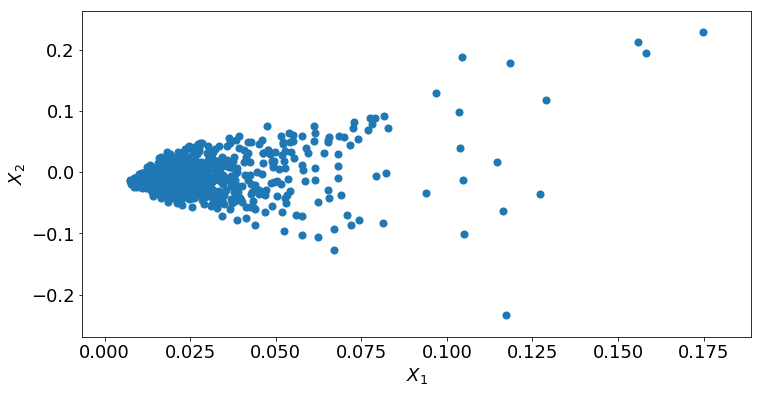

In [73]:
ax = loadings.plot(kind="scatter", x="component_1", y="component_2", figsize=(12,6), s=50)
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$X_2$", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [74]:
cont_df3.head()

,abc,able,access,according,account,accused,acres,act,action,actually,...,workers,working,world,worst,worth,wrote,year,years,york,young
0,0.0,0.0,0.0,0.065854,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.036172,0.0,0.000000,0.0,0.000000,0.0,0.063159,...,0.0,0.0,0.00000,0.055553,0.059774,0.0,0.000000,0.032821,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.043442,0.0,0.000000,...,0.0,0.0,0.03009,0.000000,0.000000,0.0,0.018563,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.083193,0.0,0.063439,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.030733,0.075485,0.0,0.0


In [75]:
svd_df3.head()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_91,component_92,component_93,component_94,component_95,component_96,component_97,component_98,component_99,component_100
0,0.349455,0.182960,-0.053999,0.047312,-0.014488,0.060353,0.012668,-0.030441,0.017390,-0.054402,...,0.032445,-0.034703,-0.005696,0.014973,0.008762,0.038432,0.021561,0.023982,-0.027080,0.073216
1,0.265548,0.044755,-0.112703,0.157208,-0.009722,0.041827,0.000899,-0.008537,0.026569,-0.041657,...,-0.029511,0.013898,0.072880,0.015939,-0.034429,0.014329,-0.001834,0.008830,0.007675,0.033588
2,0.342320,-0.075484,-0.165779,0.214610,-0.141307,-0.028939,0.006578,-0.071133,0.132140,0.064390,...,-0.053205,0.012364,-0.048489,-0.017165,-0.017444,-0.044005,-0.039355,-0.062999,-0.037947,0.003729
3,0.275635,0.042452,-0.101069,0.112983,0.021236,0.047091,0.022322,-0.036055,0.057639,-0.036386,...,0.058457,-0.030590,0.022815,0.009947,-0.008555,0.042067,-0.073075,0.016797,-0.051959,0.024956
4,0.310619,-0.013569,-0.163136,0.162584,-0.005177,0.034665,0.047084,-0.079806,-0.086759,-0.064352,...,-0.030927,0.053915,-0.036230,-0.036275,-0.026517,0.009406,-0.002257,-0.033199,0.029470,0.049796


## Try Fitting Knn 

In [ ]:
# cont_mat=tvec.fit(df['content'])
# cont_mat=tvec.transform(df['content'])
# cont_mat.shape
# len(tvec.get_feature_names())
# cont_df=pd.SparseDataFrame(cont_mat, columns=tvec.get_feature_names())

# cont_mat3=tvec.transform(df3['content'])
# cont_mat3.shape
# len(tvec.get_feature_names())
# cont_df3=pd.SparseDataFrame(cont_mat3, columns=tvec.get_feature_names())
# cont_df3.fillna(0, inplace=True)



In [76]:
X_train, X_test, y_train, y_test = train_test_split(svd_df, y, stratify=y)

In [77]:
knn = KNeighborsClassifier(n_neighbors=11)

In [78]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [79]:
knn.score(X_train, y_train)

0.8537931034482759

In [80]:
knn.score(X_test, y_test)

0.8347107438016529

In [81]:
preds=knn.predict(svd_df)

In [82]:
preds3=knn.predict(svd_df3)

In [83]:
df3.shape

(127, 6)

In [84]:
len(preds3)

127

In [85]:
df['preds']=preds

In [86]:
df3['preds3']=preds3

In [104]:
y3=df3['flood_disaster_relevance']

In [105]:

print (f' Total Score : { f1_score(preds, y)}') # 
print (f' Total Score : { f1_score(preds3, y3 )}') # True data

 Total Score : 0.7926136363636362
 Total Score : 0.5294117647058824


In [110]:
cm=confusion_matrix(y, preds)
cm_df=pd.DataFrame(cm, columns=['pred pos', 'pred_neg'],
                  index= ['actual_pos', 'actual_neg'])
cm_df

,pred pos,pred_neg
actual_pos,542,75
actual_neg,71,279


In [98]:
df3[df3['flood_disaster_relevance']==1]

,content,description,publishedAt,title,source_name,flood_disaster_relevance,preds3
4,Media captionThousands of homes destroyed as I...,"Floods have already killed at least 70 people,...",2019-04-06T07:57:14Z,Iran floods: Thousands evacuate homes as heavy...,BBC News,1,1
5,Image copyrightAFP\r\nParts of southern Africa...,Aid agencies warn that it is becoming more dan...,2019-03-22T00:28:12Z,Cyclone Idai: What are the immediate dangers?,BBC News,1,1
14,Image copyrightReutersImage caption\r\n Cyclon...,At least 417 people have now been declared dea...,2019-03-23T11:41:44Z,Cyclone Idai: More bodies under floodwater - UN,BBC News,1,1
32,Media captionCars have been swept away and hom...,Flood warnings have been issued in almost all ...,2019-03-25T17:40:07Z,Flash floods kill at least 17 in southern Iran,BBC News,1,1
42,Image copyright EPA Image caption A deluge in ...,"Five other people are missing and nearly 4,000...",2018-11-10T02:22:19Z,Jordan flash floods: Seven killed and tourists...,BBC News,1,1
56,Image copyrightEPAImage caption\r\n A man wade...,Locals in flood-hit Townsville are warned to b...,2019-02-04T09:14:27Z,Australia floods: Crocodiles seen in 'once in ...,BBC News,1,1
71,Image copyrightNebraska DOT\r\nThawing snowpac...,Two people have died while residents in Nebras...,2019-03-18T14:40:30Z,Two dead in record flooding in US Midwestern s...,BBC News,1,1
72,Image copyrightGetty ImagesImage caption\r\n G...,"The only way to access the towns, which are un...",2019-02-28T16:59:55Z,Floods and mudslides turn California wine town...,BBC News,1,1
113,Image copyrightEPAImage caption\r\n Low-lying ...,"The men's bodies were discovered near a park, ...",2019-02-05T08:28:28Z,Australia floods: Two found dead as waters gri...,BBC News,1,1


In [89]:
df3[df3['preds3']==1].head()

,content,description,publishedAt,title,source_name,flood_disaster_relevance,preds3
0,Image copyright EPA Image caption Locals have ...,Cyclone Owen has been downgraded to a tropical...,2018-12-15T23:02:13Z,"Cyclone Owen downgraded, but could reform off ...",BBC News,0,1
2,Image copyrightADDY TRITT\r\nSeveral Midwester...,As devastating flooding continues to affect th...,2019-04-03T17:28:59Z,Woman buys out shoe store to help flood victims,BBC News,0,1
3,Image copyrightAFPImage caption\r\n A man inju...,The tropical cyclone took governments by surpr...,2019-03-24T00:23:07Z,Cyclone Idai: How prepared was southern Africa?,BBC News,0,1
4,Media captionThousands of homes destroyed as I...,"Floods have already killed at least 70 people,...",2019-04-06T07:57:14Z,Iran floods: Thousands evacuate homes as heavy...,BBC News,1,1
5,Image copyrightAFP\r\nParts of southern Africa...,Aid agencies warn that it is becoming more dan...,2019-03-22T00:28:12Z,Cyclone Idai: What are the immediate dangers?,BBC News,1,1


In [90]:
df[df['preds']==1]

,content,description,title,positive,preds
1,The aid group said it had seen hundreds of cas...,With vast areas submerged by contaminated wate...,Cholera Outbreak Raises New Danger in Flood-Ra...,0,1
4,"Many of the levees, usually earthen and topped...",Hundreds of miles of levees in the Midwest hav...,"‘Breaches Everywhere’: Midwest Levees Burst, a...",0,1
7,The aid group said it had seen hundreds of cas...,With vast areas submerged by contaminated wate...,Cholera Outbreak Raises New Danger in Flood-Ra...,0,1
12,"CHICAGO Severe floods closed highways, caused ...",Martin Thompson cleared snow from a sidewalk o...,"No, Winter Isn’t Over. Hitting the Plains: A F...",1,1
13,(CNN)As if one winter storm around the holiday...,As if one winter storm around the holidays was...,New storm expected to ring in 2019,1,1
15,"By Paul P. Murphy, CNNDesign by Paul Martucci,...",Satellite images show just how high the water ...,Satellite images show Nebraska and Iowa rivers...,1,1
17,GENEVA (Reuters) - U.S. sanctions have prevent...,U.S. sanctions have prevented the Iranian Red ...,Flood-hit Iran getting no financial aid from a...,1,1
22,Our resident pastor officiated at the burials ...,Aid agencies called the devastation from Cyclo...,Mozambique Cyclone Rescuers Struggle to Reach ...,1,1
23,A historic snowy winter is turning into record...,"When a warm rain fell on a flat, frozen landsc...",Flooding in the Midwest: Why the Water Is So High,1,1
32,"Spring may be within sight, but as the calenda...",The California Department of Water Resources c...,"Snow in Forecast for a 2,500-Mile Path From Ca...",1,1


In [91]:
df[df['positive']==1]

,content,description,title,positive,preds
3,"The amount the ground can soak up is limited, ...","Flooding in the town of Hamburg, Iowa, on Marc...",Powerful Storm Threatens More Misery in Flood-...,1,0
8,Chat with us in Facebook Messenger. Find out w...,Ellen Degeneres tweeted a video of the road to...,Ellen Degeneres tweets video of flood blocking...,1,0
10,Chat with us in Facebook Messenger. Find out w...,A significant winter storm system will rapidly...,'Bomb cyclone' brings blizzard conditions,1,0
12,"CHICAGO Severe floods closed highways, caused ...",Martin Thompson cleared snow from a sidewalk o...,"No, Winter Isn’t Over. Hitting the Plains: A F...",1,1
13,(CNN)As if one winter storm around the holiday...,As if one winter storm around the holidays was...,New storm expected to ring in 2019,1,1
15,"By Paul P. Murphy, CNNDesign by Paul Martucci,...",Satellite images show just how high the water ...,Satellite images show Nebraska and Iowa rivers...,1,1
17,GENEVA (Reuters) - U.S. sanctions have prevent...,U.S. sanctions have prevented the Iranian Red ...,Flood-hit Iran getting no financial aid from a...,1,1
20,Im looking at global warming I dont need to se...,Hamburg residents held back the Missouri River...,An Iowa Town Fought and Failed to Save a Levee...,1,0
22,Our resident pastor officiated at the burials ...,Aid agencies called the devastation from Cyclo...,Mozambique Cyclone Rescuers Struggle to Reach ...,1,1
23,A historic snowy winter is turning into record...,"When a warm rain fell on a flat, frozen landsc...",Flooding in the Midwest: Why the Water Is So High,1,1


In [113]:
df.iloc[10,1]

'A significant winter storm system will rapidly intensify over the central US bringing blizzard conditions, hurricane-force wind gusts, severe weather, and a flood threat from the Rockies to the East Coast over the next 48 hours.'

In [106]:
df3.iloc[12,0]

'Image caption "Fed up with Nazis" - Ostritz\'s residents are rallying against their visitors Eva Hauptfleisch returned to her parents\' old house last month in the tiny town of Ostritz, in Germany\'s east, to join a resistance effort against neo-Nazis. She was not alone. Some  ,  supporters turned out to oppose a Shield and Sword (SS) festival taking place in a hotel on the outskirts of the town, metres from the Polish border. "Why Ostritz?" a journalist asked Thorsten Heise, the head of the extreme-right National Democratic Party (NPD) in the nearby State of Thuringia, and one of the organisers of the neo-Nazi event. "Why not?" he responded. "There\'s not enough going on in Saxony. We\'re making politics more lively." Support for far-right parties has blossomed here. In the   federal election more than  % of people in this district voted for the far-right Alternative for Germany party (AfD). But many townspeople and their supporters are determined not to let Ostritz become the poster

### Try Fitting NaiveBayes: